#### Cargamos librerías

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


#### Cargamos la matriz de aspectos y la descripción de las variables 'per'

In [9]:
# Crear el DataFrame 'df_aspectos' con los aspectos y las variables asociadas
data_aspectos = {
    'aspecto': ['DROGAS_Y_CORRUPCIÓN'],
    'var_1': ['per605'],
    'var_2': ['per603'],
    'var_3': ['per304'],
    'var_4': ['per604']
}
df_aspectos = pd.DataFrame(data_aspectos)
display(df_aspectos)
# cargar Analytical_Data
df_AD = pd.read_excel('data/Analytical_Data.xlsx')
display(df_AD.head())

,aspecto,var_1,var_2,var_3,var_4
0,DROGAS_Y_CORRUPCIÓN,per605,per603,per304,per604


,Dominio,Nombre_Dominio,Variable_per,Detalle_Dominio
0,Domain_1,External Relations,per101,Foreign Special Relationships: Positive
1,Domain_1,External Relations,per102,Foreign Special Relationships: Negative
2,Domain_1,External Relations,per103,Anti-Imperialism
3,Domain_1,External Relations,per104,Military: Positive
4,Domain_1,External Relations,per105,Military: Negative


In [3]:
detalle_dominio_values = df_AD['Detalle_Dominio'].unique().tolist()
print(detalle_dominio_values)

['Foreign Special Relationships: Positive', 'Foreign Special Relationships: Negative', 'Anti-Imperialism', 'Military: Positive', 'Military: Negative', 'Peace', 'Internationalism: Positive', 'European Community/Union: Positive', 'Internationalism: Negative', 'European Community/Union: Negative', 'Freedom and Human Rights', 'Democracy', 'Constitutionalism: Positive', 'Constitutionalism: Negative', 'Decentralization', 'Centralisation', 'Governmental and Administrative Efficiency', 'Political Corruption', 'Political Authority', 'Free Market Economy', 'Incentives: Positive', 'Market Regulation', 'Economic Planning', 'Corporatism/Mixed Economy', 'Protectionism: Positive', 'Protectionism: Negative', 'Economic Goals', 'Keynesian Demand Management', 'Economic Growth: Positive', 'Technology and Infrastructure: Positive', 'Controlled Economy', 'Nationalisation', 'Economic Orthodoxy', 'Marxist Analysis', 'Anti-Growth Economy: Positive', 'Environmental Protection', 'Culture: Positive', 'Equality: P

#### Carga del dataset y definición del périodo en análisis ('desde' y 'hasta'), y el 'aspecto'

In [11]:
# Cargar el dataset principal
# Nota: 'data/MP_Dataset_KMeans_mean.xlsx' se genera desde el data set 'crudo' del Manifesto Project (notebook 'Crea_df_ponderado.ipynb'),
# el cual ha sido ponderado por 'presvote' o 'pervote' y se le ha agregado la columna 'agno'
# Se han eliminado filas con valores NaN y columnas que NO son necesarias para K-MEANS (ventana_5, ventan_10, tipovoto)

file_path = './data/MP_Dataset_KMeans_mean.xlsx'
df = pd.read_excel(file_path)

# Filtrar el DataFrame según las variables del aspecto seleccionado y el período
aspecto_filtro = 'DROGAS_Y_CORRUPCIÓN'
desde = 2019
hasta = 2022

variables = df_aspectos[df_aspectos['aspecto'] == aspecto_filtro][['var_1', 'var_2', 'var_3', 'var_4']].dropna().values.flatten()

In [5]:
df

,agno,countryname,ventana_10,ventana_5,tipovoto,per101,per102,per103,per104,per105,...,per6013,per6014,per6061,per6071,per6072,per6081,per7051,per7052,per7061,per7062
0,1997,Albania,190,16,pervote,1.770988,0.000000,0.031388,3.046506,0.015910,...,2.021481,0.0,0.0,0.0,0.0,0.0,0.637892,0.363756,0.0,0.0
1,2001,Albania,200,17,pervote,2.392570,0.000000,0.000000,2.757403,0.026619,...,0.989546,0.0,0.0,0.0,0.0,0.0,0.897238,0.508457,0.0,0.0
2,1989,Argentina,180,14,presvote,0.000000,0.000000,4.619213,0.448618,0.828036,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
3,1995,Argentina,190,16,presvote,0.061642,0.020140,0.143247,0.882433,0.083005,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
4,1999,Argentina,190,16,presvote,0.192543,0.000000,0.582363,0.524400,0.017829,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,2008,United States,200,18,pervote,1.978711,0.088485,0.044020,5.839310,0.088485,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
735,2012,United States,210,19,presvote,0.505120,0.161887,0.189797,7.527242,1.491961,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
736,2016,United States,210,20,presvote,0.866280,0.111349,0.000000,5.807609,0.763045,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
737,2020,United States,220,21,presvote,1.190682,0.129249,0.161450,5.565559,1.951804,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0


### Analicemos la distribución de las variables seleccionadas en todo el dataset (todos los períodos) 

Estadísticas descriptivas considerando todos los períodos:


,count,mean,std,min,25%,50%,75%,max
per605,739.0,2.638929,2.532031,0.0,0.485211,2.010903,4.179203,14.205347
per603,739.0,1.431890,1.716172,0.0,0.272377,0.931966,1.979594,16.868819
per304,739.0,1.263001,2.042249,0.0,0.064259,0.560677,1.583637,17.596681
per604,739.0,0.187187,0.426697,0.0,0.000000,0.000000,0.183839,4.965615


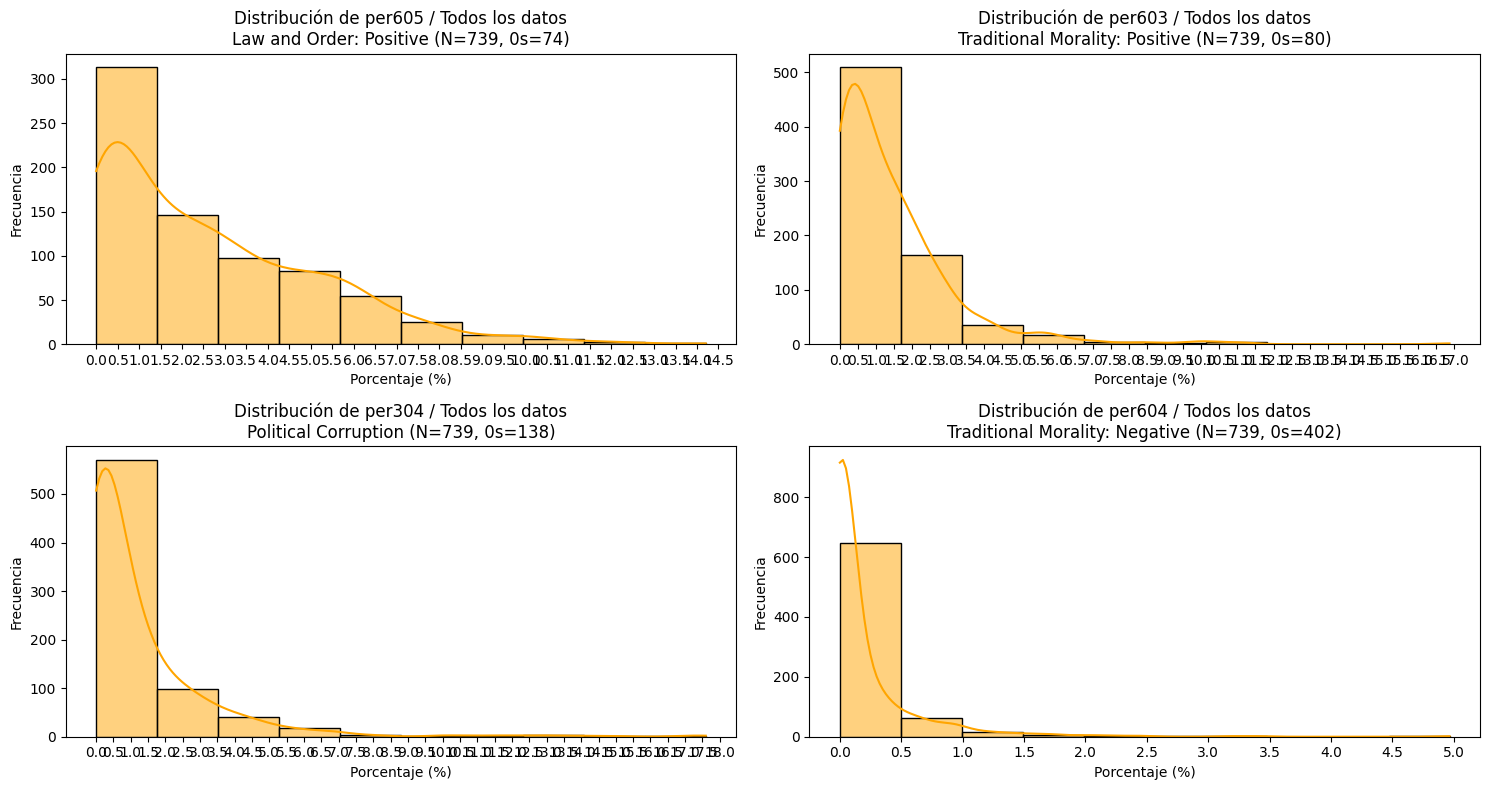

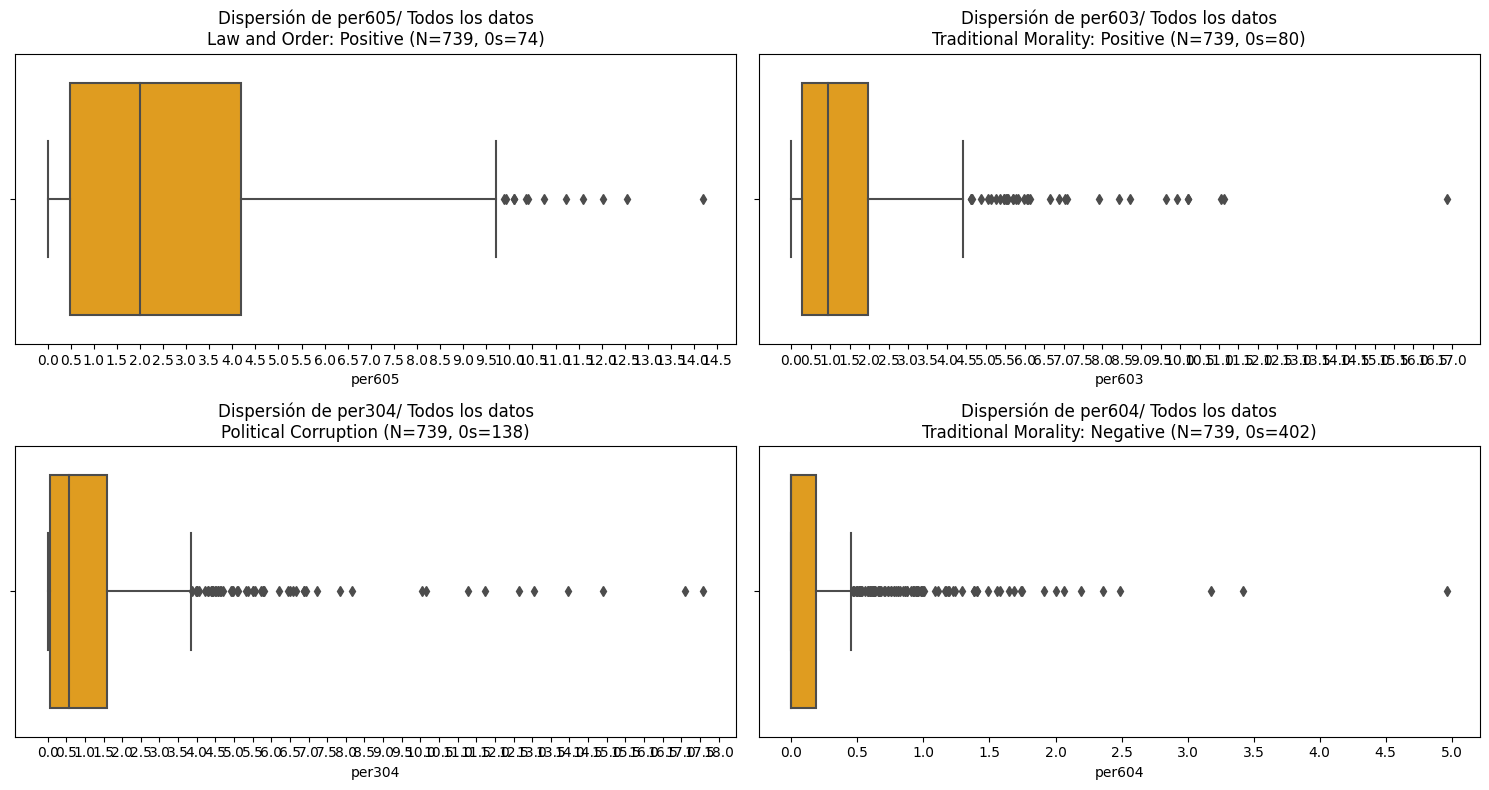

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Lista de variables 'per' seleccionadas para el análisis
selected_variables = variables  # Asegúrate de que esta lista ya contenga las variables relevantes

# Asegurar que las variables existen en el DataFrame
selected_variables = [var for var in selected_variables if var in df.columns]

# Filtrar el dataframe para las columnas seleccionadas
df_selected = df[selected_variables].fillna(0)  # Rellenar valores NaN con 0

# Obtener el detalle de las variables del DataFrame 'df_AD'
variable_details = dict(zip(df_AD['Variable_per'], df_AD['Detalle_Dominio']))

# Estadísticas descriptivas
print("Estadísticas descriptivas considerando todos los períodos:")
display(df_selected.describe().T)

# Visualizar histogramas para las variables seleccionadas
num_variables = len(selected_variables)
plt.figure(figsize=(15, num_variables * 2))  # Ajustar altura del gráfico en función de las variables

for i, var in enumerate(selected_variables):
    plt.subplot((num_variables + 1) // 2, 2, i + 1)  # Dos gráficos por línea
    sns.histplot(df_selected[var], kde=True, bins=10, color='orange')  # Color de las barras en naranja
    detail = variable_details.get(var, "Detalle no disponible")  # Obtener detalle o indicar no disponible
    count = len(df_selected[var])  # Número total de datos
    zeros = (df_selected[var] == 0).sum()  # Número de valores iguales a cero
    plt.title(f'Distribución de {var} / Todos los datos\n{detail} (N={count}, 0s={zeros})')
    plt.xlabel('Porcentaje (%)')
    plt.ylabel('Frecuencia')
    plt.xticks(np.arange(0, df_selected[var].max() + 0.5, 0.5))  # Barras cada 0.5%

plt.tight_layout()
plt.show()

# Visualizar boxplots para observar la dispersión de las variables seleccionadas
plt.figure(figsize=(15, num_variables * 2))  # Ajustar altura del gráfico en función de las variables

for i, var in enumerate(selected_variables):
    plt.subplot((num_variables + 1) // 2, 2, i + 1)  # Dos gráficos por línea
    sns.boxplot(x=df_selected[var], color='orange')  # Color del boxplot en naranja
    detail = variable_details.get(var, "Detalle no disponible")  # Obtener detalle o indicar no disponible
    count = len(df_selected[var])  # Número total de datos
    zeros = (df_selected[var] == 0).sum()  # Número de valores iguales a cero
    plt.title(f'Dispersión de {var}/ Todos los datos\n{detail} (N={count}, 0s={zeros})')
    plt.xlabel(var)
    plt.xticks(np.arange(0, df_selected[var].max() + 0.5, 0.5))  # Barras cada 0.5%

plt.tight_layout()
plt.show()


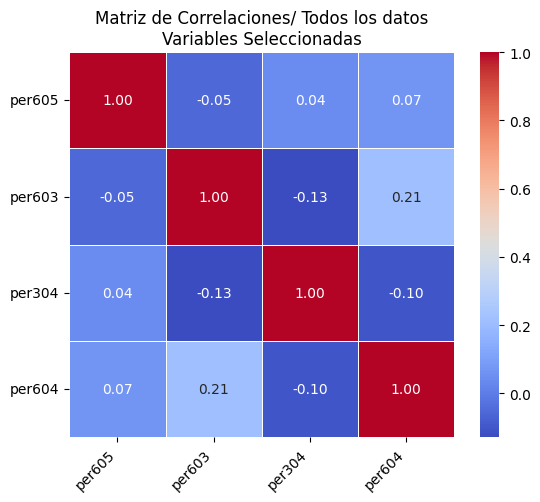

No hay variables con correlación mayor al umbral establecido.


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlaciones para las variables seleccionadas
correlation_matrix = df_selected[selected_variables].corr()

# Visualizar la matriz de correlaciones como un heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    cbar=True, 
    linewidths=0.5, 
    square=True
)
plt.title("Matriz de Correlaciones/ Todos los datos\nVariables Seleccionadas")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Identificar pares de variables altamente correlacionadas (umbral > 0.8)
threshold = 0.8
high_corr_pairs = correlation_matrix.where(
    (correlation_matrix.abs() > threshold) & (correlation_matrix.abs() < 1)
).stack().reset_index()
high_corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlación']

if not high_corr_pairs.empty:
    print("Pares de variables altamente correlacionadas:")
    display(high_corr_pairs)
else:
    print("No hay variables con correlación mayor al umbral establecido.")


#### Análisis de las correlaciones: ********** REVISAR*********
* La máxima correlación posotiva es 0,29: Las variables tienen alguna relación en ciertos contextos, pero no son interdependientes de manera significativa en la mayoría de los casos.
* La máxima correlación negativa es -0,13: Hay competencia leve entre algunas variables, pero no es significativa. Esto puede deberse a que las variables representan temas conceptualmente distintos o porque la variabilidad es muy baja
* La falta de correlaciones fuertes sugiere que las variables están actuando de manera relativamente independiente, lo cual es valioso para el análisis de clusters.


#### COMENTARIO a la distribución de las variables seleccionadas considerando todo el dataset: ********** REVISAR*********
* El hecho de que las variables 'per' estén normalizadas y deban sumar 1 para cada año-país introduce dependencia entre las variables
* Esto significa que si una o más variables tienen valores altos en un año-país específico, necesariamente las otras variables tendrán valores bajos, incluso 0, para mantener la suma constante
* Como hay muchas combinaciones año-país donde ciertas variables 'per' tienen poca relevancia (p. ej., corrupción o drogas no son temas prioritarios en ciertos contextos), sus valores tienden a ser pequeños o nulos en esos casos
* Estas pequeñas proporciones hacen que los histogramas tengan muchas barras concentradas cerca de 0, lo que explica la forma sesgada hacia la izquierda
* La media baja y la desviación estándar alta reflejan que la mayoría de los valores son pequeños (cercanos a 0), pero hay algunos casos donde la variable es prioritaria y tiene valores más grandes, aumentando la dispersión
* Es probable ver correlaciones negativas entre algunas variables 'per', ya que un aumento en una variable implica necesariamente una disminución en otras
* Las distribuciones cargadas a la izquierda son un resultado esperado y están directamente relacionadas con la naturaleza de los datos
* Este comportamiento no indica un error en el modelo o en el análisis, sino una característica inherente de los programas presidenciales, donde ciertos temas dominan mientras otros son secundarios o ausentes


#### Reproceso

#### Extraemos  las columnas 'per' principales (per101 a per706)

In [15]:
# Filtrar las columnas que comienzan con 'per' y tienen longitud 6
per_columns = [col for col in df.columns if col.startswith('per') and len(col) == 6]

# Crear el DataFrame 'df_s' con las columnas 'agno', 'countryname' y las columnas seleccionadas
columns_to_extract = ['agno', 'countryname'] + per_columns
df_s = df[columns_to_extract].copy()

# Mostrar el resultado
print("Columnas seleccionadas para 'df_s':")
print(columns_to_extract)
display(df_s.head())


Columnas seleccionadas para 'df_s':
['agno', 'countryname', 'per101', 'per102', 'per103', 'per104', 'per105', 'per106', 'per107', 'per108', 'per109', 'per110', 'per201', 'per202', 'per203', 'per204', 'per301', 'per302', 'per303', 'per304', 'per305', 'per401', 'per402', 'per403', 'per404', 'per405', 'per406', 'per407', 'per408', 'per409', 'per410', 'per411', 'per412', 'per413', 'per414', 'per415', 'per416', 'per501', 'per502', 'per503', 'per504', 'per505', 'per506', 'per507', 'per601', 'per602', 'per603', 'per604', 'per605', 'per606', 'per607', 'per608', 'per701', 'per702', 'per703', 'per704', 'per705', 'per706']


,agno,countryname,per101,per102,per103,per104,per105,per106,per107,per108,...,per605,per606,per607,per608,per701,per702,per703,per704,per705,per706
0,1997,Albania,1.770988,0.00000,0.031388,3.046506,0.015910,0.032313,3.406129,1.114989,...,6.169728,0.693075,0.047278,0.0,0.653683,0.000000,7.209393,0.000000,0.432663,3.775716
1,2001,Albania,2.392570,0.00000,0.000000,2.757403,0.026619,0.023948,3.523162,1.452779,...,4.998334,0.559072,0.008873,0.0,0.221163,0.000000,12.047034,0.000000,0.542726,5.413989
2,1989,Argentina,0.000000,0.00000,4.619213,0.448618,0.828036,0.338070,2.955090,0.000000,...,1.449244,7.595332,0.326532,0.0,6.796459,0.000000,2.495280,0.000000,0.204032,2.052427
3,1995,Argentina,0.061642,0.02014,0.143247,0.882433,0.083005,1.107286,1.996025,1.669947,...,0.760726,1.997920,0.323973,0.0,2.925856,0.000000,1.499031,0.000000,0.247097,1.202382
4,1999,Argentina,0.192543,0.00000,0.582363,0.524400,0.017829,0.613450,3.482869,2.262154,...,4.334891,2.496205,0.928464,0.0,2.535425,0.089349,1.074752,0.039445,0.899614,1.459349


#### Normalizamos las filas

In [16]:
# Identificar las columnas que comienzan con 'per'
per_columns = [col for col in df_s.columns if col.startswith('per')]

# Calcular la suma de las columnas 'per' para cada fila
df_s['per_sum'] = df_s[per_columns].sum(axis=1)

# Identificar las filas que necesitan normalización (donde la suma no sea 100)
rows_to_normalize = df_s['per_sum'] != 100

# Normalizar las filas afectadas dividiendo cada valor por la suma y multiplicando por 100
df_s.loc[rows_to_normalize, per_columns] = df_s.loc[rows_to_normalize, per_columns].div(
    df_s.loc[rows_to_normalize, 'per_sum'], axis=0
) * 100

# Eliminar la columna auxiliar 'per_sum'
df_s.drop(columns=['per_sum'], inplace=True)

# Verificar que todas las filas ahora suman 100
assert df_s[per_columns].sum(axis=1).round(6).eq(100).all(), "Error: No todas las filas suman 100."

# Mostrar el resultado
print("Normalización completada. Primeras filas del DataFrame normalizado:")
display(df_s.head())


Normalización completada. Primeras filas del DataFrame normalizado:


,agno,countryname,per101,per102,per103,per104,per105,per106,per107,per108,...,per605,per606,per607,per608,per701,per702,per703,per704,per705,per706
0,1997,Albania,2.047208,0.000000,0.036283,3.521667,0.018391,0.037353,3.937380,1.288893,...,7.132017,0.801174,0.054652,0.0,0.755637,0.000000,8.333838,0.00000,0.500146,4.364612
1,2001,Albania,2.761724,0.000000,0.000000,3.182847,0.030726,0.027643,4.066757,1.676930,...,5.769535,0.645332,0.010242,0.0,0.255287,0.000000,13.905792,0.00000,0.626465,6.249323
2,1989,Argentina,0.000000,0.000000,4.643342,0.450962,0.832361,0.339836,2.970526,0.000000,...,1.456814,7.635007,0.328238,0.0,6.831962,0.000000,2.508315,0.00000,0.205098,2.063148
3,1995,Argentina,0.062411,0.020391,0.145034,0.893437,0.084040,1.121093,2.020915,1.690770,...,0.770212,2.022833,0.328013,0.0,2.962340,0.000000,1.517723,0.00000,0.250178,1.217375
4,1999,Argentina,0.198715,0.000000,0.601030,0.541209,0.018401,0.633114,3.594509,2.334666,...,4.473842,2.576219,0.958226,0.0,2.616696,0.092213,1.109202,0.04071,0.928451,1.506127


In [17]:
# Exportar el DataFrame 'df_s' a un archivo Excel
output_file_path = './data/MP_ponderado_y_normalizado.xlsx'
df_s.to_excel(output_file_path, index=False)

print(f"DataFrame 'df_s' exportado exitosamente a {output_file_path}")

DataFrame 'df_s' exportado exitosamente a ./data/MP_ponderado_y_normalizado.xlsx


In [18]:
df_s.shape

(739, 58)

#### Identificamos valores NaN

In [19]:
# Verificar si hay valores NaN en el DataFrame
nan_rows = df_s[df_s.isnull().any(axis=1)]
num_nan_rows = len(nan_rows)

# Informar el número de filas con valores NaN
if num_nan_rows > 0:
    print(f"Se encontraron {num_nan_rows} filas con valores NaN.")
else:
    print("No se encontraron filas con valores NaN.")

# Eliminar las filas con valores NaN
df_s = df_s.dropna()

# Verificar el número de filas restantes
print(f"Filas restantes después de eliminar valores NaN: {len(df_s)}")

# Mostrar un ejemplo del DataFrame limpio
display(df_s.head())


No se encontraron filas con valores NaN.
Filas restantes después de eliminar valores NaN: 739


,agno,countryname,per101,per102,per103,per104,per105,per106,per107,per108,...,per605,per606,per607,per608,per701,per702,per703,per704,per705,per706
0,1997,Albania,2.047208,0.000000,0.036283,3.521667,0.018391,0.037353,3.937380,1.288893,...,7.132017,0.801174,0.054652,0.0,0.755637,0.000000,8.333838,0.00000,0.500146,4.364612
1,2001,Albania,2.761724,0.000000,0.000000,3.182847,0.030726,0.027643,4.066757,1.676930,...,5.769535,0.645332,0.010242,0.0,0.255287,0.000000,13.905792,0.00000,0.626465,6.249323
2,1989,Argentina,0.000000,0.000000,4.643342,0.450962,0.832361,0.339836,2.970526,0.000000,...,1.456814,7.635007,0.328238,0.0,6.831962,0.000000,2.508315,0.00000,0.205098,2.063148
3,1995,Argentina,0.062411,0.020391,0.145034,0.893437,0.084040,1.121093,2.020915,1.690770,...,0.770212,2.022833,0.328013,0.0,2.962340,0.000000,1.517723,0.00000,0.250178,1.217375
4,1999,Argentina,0.198715,0.000000,0.601030,0.541209,0.018401,0.633114,3.594509,2.334666,...,4.473842,2.576219,0.958226,0.0,2.616696,0.092213,1.109202,0.04071,0.928451,1.506127


#### Creamos el dataframe para el resto del proceso (K-MEANS), con las variables 'per' del aspecto y períodod en análisis

In [20]:
if isinstance(variables, np.ndarray):
    variables = variables.tolist()
# Filtrar las filas según el rango de 'agno' y extraer las columnas relevantes
columns_to_extract = ['agno', 'countryname'] + variables
df_filtered = df_s[(df_s['agno'] >= desde) & (df_s['agno'] <= hasta)][columns_to_extract].copy()

# Mostrar el resultado
print(f"Filtrado para el período desde {desde} hasta {hasta}.")
print(f"Columnas seleccionadas para el aspecto:")
print(columns_to_extract)
display(df_filtered.head())


Filtrado para el período desde 2019 hasta 2022.
Columnas seleccionadas para el aspecto:
['agno', 'countryname', 'per605', 'per603', 'per304', 'per604']


,agno,countryname,per605,per603,per304,per604
10,2019,Argentina,3.404865,0.080290,6.263886,0.000000
18,2021,Armenia,1.220453,0.275558,1.583356,0.011995
47,2019,Australia,4.822758,0.000000,1.084822,0.051265
48,2022,Australia,2.718028,0.428861,2.414937,0.092963
70,2019,Austria,6.896474,0.942597,1.526862,0.293947


In [21]:
df_filtered.shape

(30, 6)

### Vamos al período en análisis

#### Para el período en análisis, si un país aparece más de una vez, se debe dejar sólo una vez, para lo cual se promediarán los valores de las variables 'per'

In [22]:
df_s.columns

Index(['agno', 'countryname', 'per101', 'per102', 'per103', 'per104', 'per105',
       'per106', 'per107', 'per108', 'per109', 'per110', 'per201', 'per202',
       'per203', 'per204', 'per301', 'per302', 'per303', 'per304', 'per305',
       'per401', 'per402', 'per403', 'per404', 'per405', 'per406', 'per407',
       'per408', 'per409', 'per410', 'per411', 'per412', 'per413', 'per414',
       'per415', 'per416', 'per501', 'per502', 'per503', 'per504', 'per505',
       'per506', 'per507', 'per601', 'per602', 'per603', 'per604', 'per605',
       'per606', 'per607', 'per608', 'per701', 'per702', 'per703', 'per704',
       'per705', 'per706'],
      dtype='object')

In [23]:
# Identificar países con más de una elección en el período
duplicated_countries = df_filtered['countryname'].value_counts()
duplicated_countries = duplicated_countries[duplicated_countries > 1]

if not duplicated_countries.empty:
    print("\nPaíses con más de una elección en el período:")
    for country in duplicated_countries.index:
        print(f"\n{country}:")
        
        # Filtrar datos del país con duplicados
        country_data = df_filtered[df_filtered['countryname'] == country]
        
        # Imprimir los registros originales
        print(f"Registros originales ({len(country_data)}):")
        display(country_data)
        
        # Promediar las columnas `per` y conservar el primer año
        per_columns = [col for col in df_filtered.columns if col.startswith('per')]
        averaged_row = country_data[per_columns].mean().to_dict()
        averaged_row['agno'] = country_data['agno'].min()  # Primer año del período
        averaged_row['countryname'] = country
        
        # Imprimir los valores promedio
        print("\nValores promediados:")
        for key, value in averaged_row.items():
            if key in per_columns:  # Solo mostrar columnas 'per'
                print(f"{key}: {value:.4f}")
        
        # Eliminar los registros originales del dataframe filtrado
        df_periodo = df_filtered[df_filtered['countryname'] != country]
        
        # Agregar el registro promediado al dataframe
        df_periodo = pd.concat([df_periodo, pd.DataFrame([averaged_row])], ignore_index=True)

else:
    print("\nNo hay países con más de una elección en el período.")

# Verificar los resultados finales
print("\nDataframe ajustado (un registro por país en el período):")
display(df_periodo)



Países con más de una elección en el período:

Australia:
Registros originales (2):


,agno,countryname,per605,per603,per304,per604
47,2019,Australia,4.822758,0.000000,1.084822,0.051265
48,2022,Australia,2.718028,0.428861,2.414937,0.092963



Valores promediados:
per605: 3.7704
per603: 0.2144
per304: 1.7499
per604: 0.0721

Dataframe ajustado (un registro por país en el período):


,agno,countryname,per605,per603,per304,per604
0,2019,Argentina,3.404865,0.080290,6.263886,0.000000
1,2021,Armenia,1.220453,0.275558,1.583356,0.011995
2,2019,Austria,6.896474,0.942597,1.526862,0.293947
3,2019,Belgium,5.774432,0.354024,0.271362,0.994098
4,2022,Brazil,4.434843,1.219753,2.607546,0.000000
5,2019,Canada,6.204897,0.345183,1.062301,0.377854
6,2021,Chile,4.845540,0.902457,0.658547,1.166186
7,2019,Denmark,3.674682,0.263332,0.048412,0.628571
8,2019,Estonia,3.200380,1.228314,0.231891,0.075560
9,2019,Finland,2.107909,1.110061,0.132115,0.273093


#### Análisis exploratorio sobre las variables seleccionadas en el período en análisis

Estadísticas descriptivas de las variables seleccionadas (Período 2019 a 2022):


,count,mean,std,min,25%,50%,75%,max
per605,29.0,4.173831,2.528298,0.477620,2.779743,3.674682,5.130999,14.207415
per603,29.0,0.756833,0.845114,0.000000,0.263332,0.354024,1.084859,4.362304
per304,29.0,1.787618,2.326635,0.048412,0.608956,0.889827,1.914485,11.302224
per604,29.0,0.323844,0.361798,0.000000,0.011995,0.221377,0.628571,1.166186


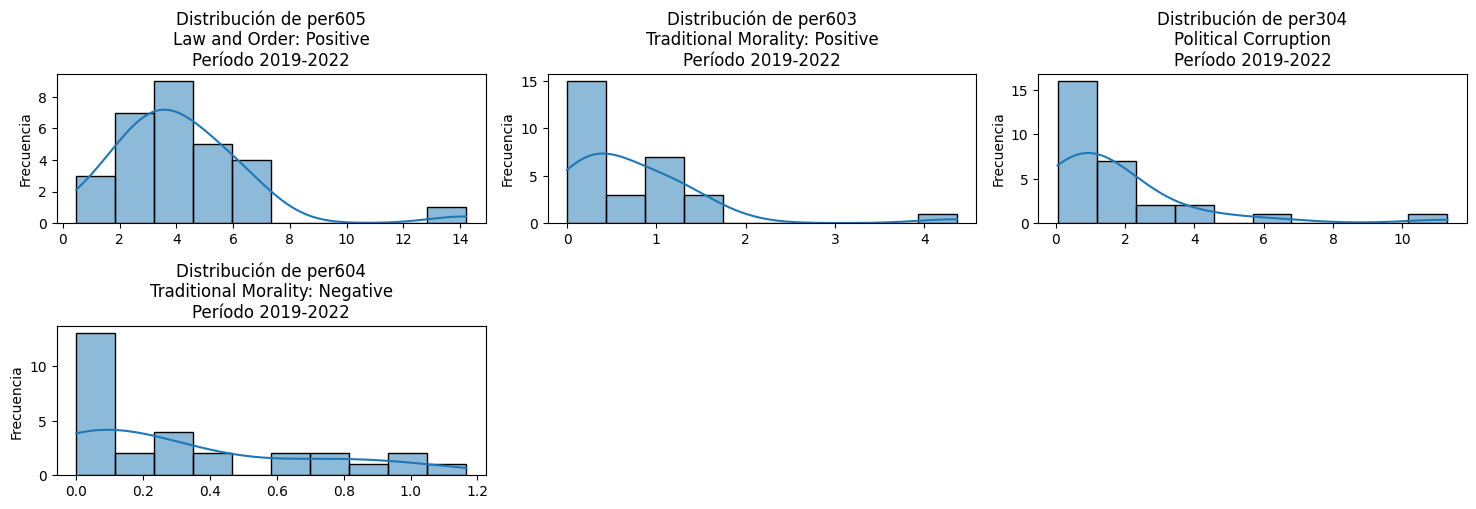

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de variables 'per' seleccionadas al inicio
selected_variables = variables

# Filtrar el dataframe para estas variables
df_selected = df_periodo[selected_variables]

# Crear un diccionario para mapear cada variable con su detalle desde 'df_AD'
variable_details = df_AD.set_index('Variable_per')['Detalle_Dominio'].to_dict()

# Estadísticas descriptivas
print(f"Estadísticas descriptivas de las variables seleccionadas (Período {desde} a {hasta}):")
display(df_selected.describe().T)

# Visualizar histogramas
plt.figure(figsize=(15, 10))
for i, var in enumerate(selected_variables):
    plt.subplot(4, 3, i + 1)
    sns.histplot(df_selected[var], kde=True, bins=10)
    # Título con el detalle de la variable
    detail = variable_details.get(var, "Detalle no disponible")
    plt.title(f'Distribución de {var}\n{detail}\nPeríodo {desde}-{hasta}')
    plt.xlabel('')
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


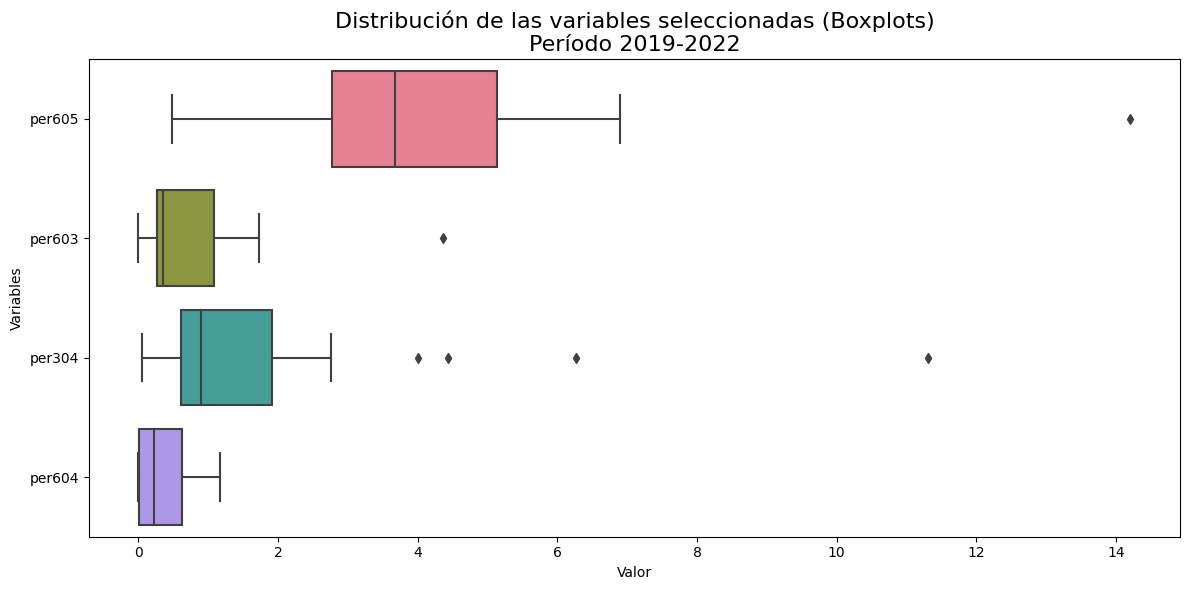

In [25]:
# Crear un único gráfico con los boxplots para las variables en 'selected_variables'
plt.figure(figsize=(12, 6))

# Crear una paleta de colores
palette = sns.color_palette("husl", len(selected_variables))

# Dibujar los boxplots con orientación horizontal
sns.boxplot(data=df_selected[selected_variables], orient="h", palette=palette)

# Configurar el título y etiquetas
plt.title(f'Distribución de las variables seleccionadas (Boxplots)\nPeríodo {desde}-{hasta}', fontsize=16)
plt.xlabel('Valor')
plt.ylabel('Variables')

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()


In [26]:
if not isinstance(selected_variables, list):
    selected_variables = list(selected_variables)
df_selected = df_periodo[['countryname', 'agno'] + selected_variables].copy()


In [27]:
df_selected

,countryname,agno,per605,per603,per304,per604
0,Argentina,2019,3.404865,0.080290,6.263886,0.000000
1,Armenia,2021,1.220453,0.275558,1.583356,0.011995
2,Austria,2019,6.896474,0.942597,1.526862,0.293947
3,Belgium,2019,5.774432,0.354024,0.271362,0.994098
4,Brazil,2022,4.434843,1.219753,2.607546,0.000000
5,Canada,2019,6.204897,0.345183,1.062301,0.377854
6,Chile,2021,4.845540,0.902457,0.658547,1.166186
7,Denmark,2019,3.674682,0.263332,0.048412,0.628571
8,Estonia,2019,3.200380,1.228314,0.231891,0.075560
9,Finland,2019,2.107909,1.110061,0.132115,0.273093


#### Análisis de outliers

In [28]:
# Asegurar que `df_selected` incluye 'countryname' y 'agno'
df_selected = df_periodo[['countryname', 'agno'] + selected_variables].copy()

# Crear un diccionario para obtener los detalles de las variables 'per' desde 'df_AD'
variable_details = df_AD.set_index('Variable_per')['Detalle_Dominio'].to_dict()

# Identificar valores extremos usando el rango intercuartílico (IQR)
for var in selected_variables:
    Q1 = df_selected[var].quantile(0.25)  # Primer cuartil
    Q3 = df_selected[var].quantile(0.75)  # Tercer cuartil
    IQR = Q3 - Q1  # Rango intercuartílico
    
    # Filtrar outliers
    outliers = df_selected[(df_selected[var] < (Q1 - 1.5 * IQR)) | (df_selected[var] > (Q3 + 1.5 * IQR))]
    
    # Mostrar resultados
    print(f"\nVariable: {var}")
    print(f"Descripción: {variable_details.get(var, 'Descripción no disponible')}")
    print(f"Número de outliers: {len(outliers)}")
    
    if not outliers.empty:
        print("Países outliers:")
        countries_outliers = outliers['countryname'].unique()
        print(", ".join(countries_outliers))
        
        # Mostrar detalle de los registros outliers
        display(outliers[['countryname', 'agno', var]])



Variable: per605
Descripción: Law and Order: Positive
Número de outliers: 1
Países outliers:
Sweden


,countryname,agno,per605
24,Sweden,2022,14.207415



Variable: per603
Descripción: Traditional Morality: Positive
Número de outliers: 1
Países outliers:
United States


,countryname,agno,per603
27,United States,2020,4.362304



Variable: per304
Descripción: Political Corruption
Número de outliers: 4
Países outliers:
Argentina, Moldova, South Africa, Ukraine


,countryname,agno,per304
0,Argentina,2019,6.263886
15,Moldova,2019,4.000920
21,South Africa,2019,4.430907
25,Ukraine,2019,11.302224



Variable: per604
Descripción: Traditional Morality: Negative
Número de outliers: 0


/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_20576/900797471.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_selected[var], shade=True)
/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_20576/900797471.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_selected[var], shade=True)
/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_20576/900797471.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_selected[var], shade=True)
/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_20576/900797471.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill

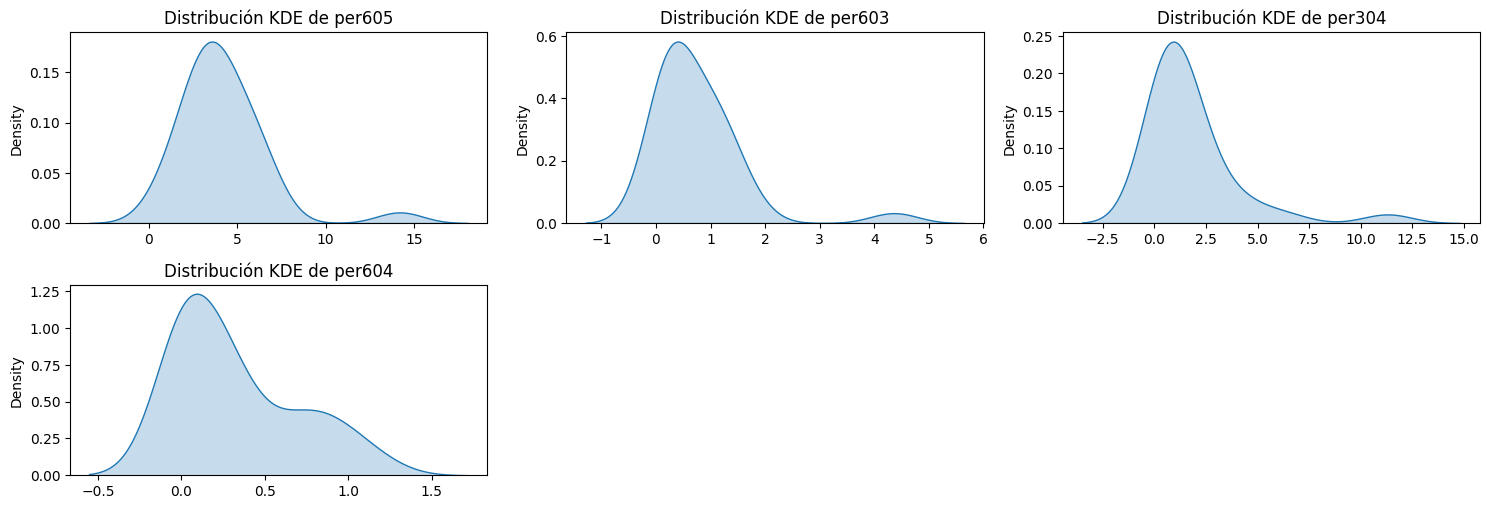

In [29]:
# Visualización KDE
plt.figure(figsize=(15, 10))
for i, var in enumerate(selected_variables):
    plt.subplot(4, 3, i + 1)
    sns.kdeplot(df_selected[var], shade=True)
    plt.title(f'Distribución KDE de {var}')
    plt.xlabel('')
plt.tight_layout()
plt.show()


#### Análisis de correlaciones

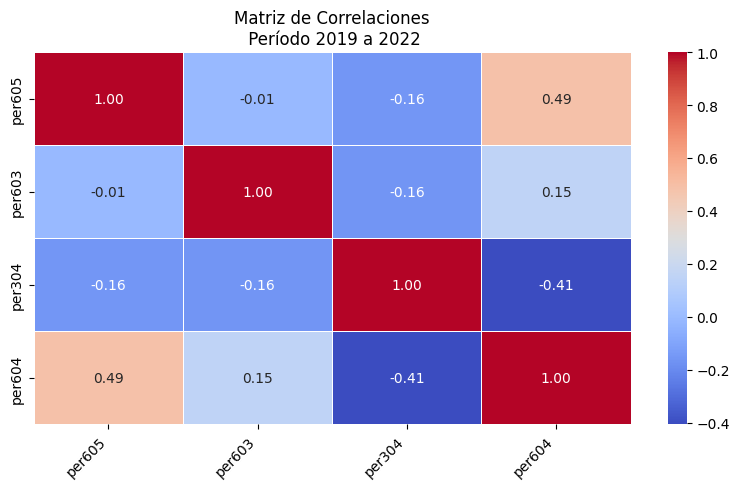

No hay variables con correlación mayor al umbral establecido.


In [30]:
# Seleccionar solo las columnas numéricas para el cálculo de correlaciones
df_selected_numeric = df_selected[selected_variables]

# Calcular la matriz de correlaciones
correlation_matrix = df_selected_numeric.corr()

# Visualizar la matriz de correlaciones como un heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title(f"Matriz de Correlaciones\n Período {desde} a {hasta}")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Identificar pares de variables altamente correlacionadas (umbral > 0.8)
threshold = 0.8
high_corr_pairs = correlation_matrix.where(
    (correlation_matrix.abs() > threshold) & (correlation_matrix.abs() < 1)
).stack().reset_index()
high_corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlación']

if not high_corr_pairs.empty:
    print("Pares de variables altamente correlacionadas:")
    display(high_corr_pairs)
else:
    print("No hay variables con correlación mayor al umbral establecido.")


In [31]:
df_periodo

,agno,countryname,per605,per603,per304,per604
0,2019,Argentina,3.404865,0.080290,6.263886,0.000000
1,2021,Armenia,1.220453,0.275558,1.583356,0.011995
2,2019,Austria,6.896474,0.942597,1.526862,0.293947
3,2019,Belgium,5.774432,0.354024,0.271362,0.994098
4,2022,Brazil,4.434843,1.219753,2.607546,0.000000
5,2019,Canada,6.204897,0.345183,1.062301,0.377854
6,2021,Chile,4.845540,0.902457,0.658547,1.166186
7,2019,Denmark,3.674682,0.263332,0.048412,0.628571
8,2019,Estonia,3.200380,1.228314,0.231891,0.075560
9,2019,Finland,2.107909,1.110061,0.132115,0.273093


In [32]:
df_filtered = df_periodo.copy()
df_filtered

,agno,countryname,per605,per603,per304,per604
0,2019,Argentina,3.404865,0.080290,6.263886,0.000000
1,2021,Armenia,1.220453,0.275558,1.583356,0.011995
2,2019,Austria,6.896474,0.942597,1.526862,0.293947
3,2019,Belgium,5.774432,0.354024,0.271362,0.994098
4,2022,Brazil,4.434843,1.219753,2.607546,0.000000
5,2019,Canada,6.204897,0.345183,1.062301,0.377854
6,2021,Chile,4.845540,0.902457,0.658547,1.166186
7,2019,Denmark,3.674682,0.263332,0.048412,0.628571
8,2019,Estonia,3.200380,1.228314,0.231891,0.075560
9,2019,Finland,2.107909,1.110061,0.132115,0.273093


#### K-MEANS
* Aplicamos el elbow method para determinar un número óptimo de clusters según K-MEANS
* Ejecutamos K Means
* En base a la mayor varianza en los datos originales, elegimos los dos ejes para el gráfico 2D de los Clusters

/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/

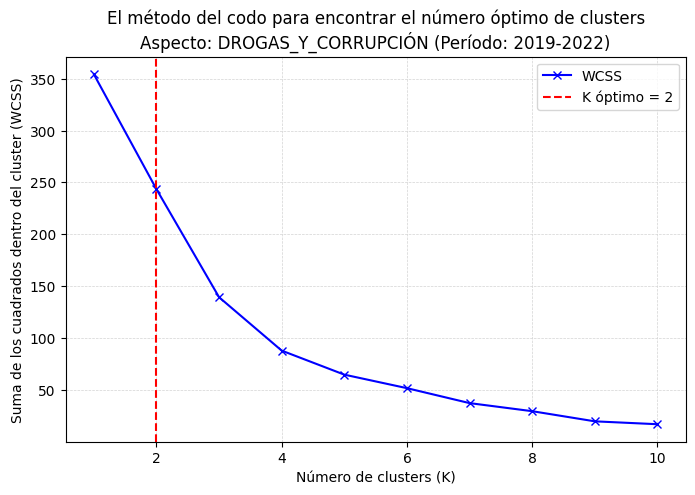

Análisis de varianza de las variables originales:


/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Variable,Varianza
per605,per605,6.171865
per304,per304,5.226568
per603,per603,0.689589
per604,per604,0.126384


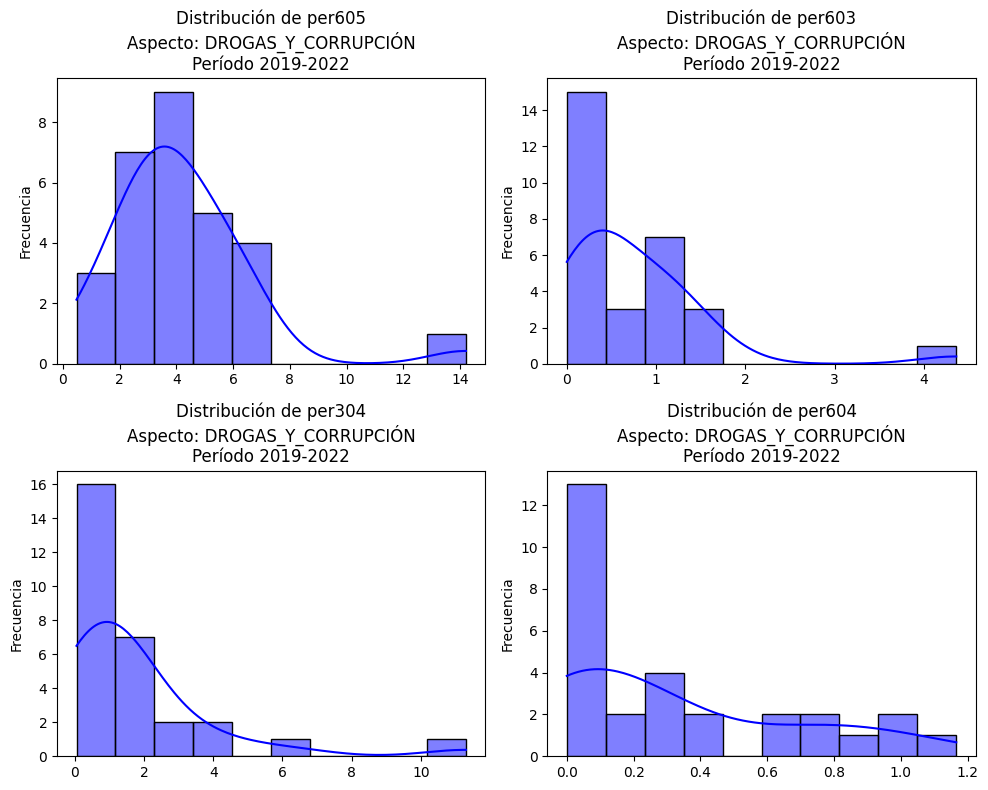


Variables seleccionadas para los ejes del gráfico 2D y 3D: ['per605', 'per304', 'per603']


/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_20576/3432916647.py:85: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab10', k_optimo)


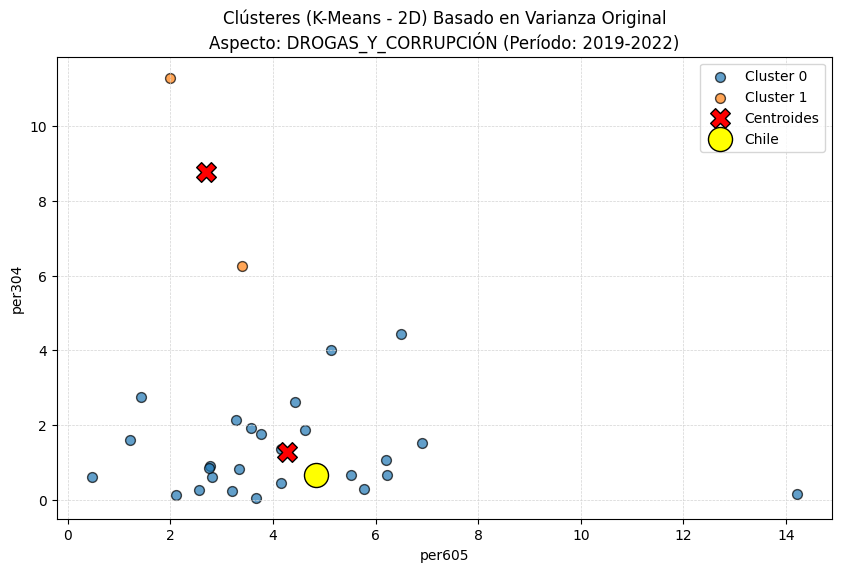

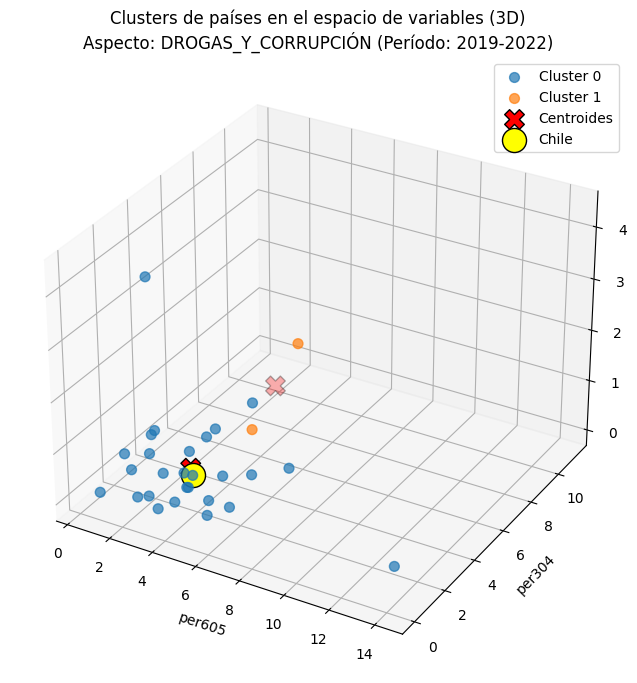


Cluster 0:
Armenia, Austria, Belgium, Brazil, Canada, Chile, Denmark, Estonia, Finland, Georgia, Germany, Greece, Iceland, Lithuania, Moldova, Montenegro, Netherlands, New Zealand, Panama, Portugal, South Africa, South Korea, Spain, Sweden, United Kingdom, United States, Australia

Cluster 1:
Argentina, Ukraine


In [33]:
# Importar las librerías necesarias
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.cm as cm

# Prepara los datos: extrae las variables numéricas para el clustering
X = df_filtered[variables]

# Método del codo para encontrar el número óptimo de clusters
wcss = []  # Suma de los cuadrados dentro del cluster
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Identificar automáticamente el número óptimo de clusters con la máxima caída relativa en WCSS
diffs = np.diff(wcss)
k_optimo = np.argmin(diffs) + 2  # +2 porque el índice empieza en 0 y buscamos la siguiente caída máxima

# Graficar el método del codo con línea vertical en el número óptimo de clusters
plt.figure(figsize=(8, 5))
plt.plot(K, wcss, 'bx-', label="WCSS")
plt.axvline(x=k_optimo, color='red', linestyle='--', label=f"K óptimo = {k_optimo}")
plt.xlabel('Número de clusters (K)')
plt.ylabel('Suma de los cuadrados dentro del cluster (WCSS)')
plt.title('El método del codo para encontrar el número óptimo de clusters\nAspecto: {} (Período: {}-{})'.format(aspecto_filtro, desde, hasta))
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

# Aplicar K-MEANS con el número óptimo de clusters
kmeans = KMeans(n_clusters=k_optimo, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Añadir las etiquetas de cluster al DataFrame
df_filtered['Cluster'] = labels

# Centroides del K-MEANS
centroids = kmeans.cluster_centers_

# Cálculo de la varianza de las variables originales
variances_original = np.var(X, axis=0)
variance_df_original = pd.DataFrame({'Variable': variables, 'Varianza': variances_original})
variance_df_original = variance_df_original.sort_values(by='Varianza', ascending=False)

# Mostrar el análisis de varianza original
print("Análisis de varianza de las variables originales:")
display(variance_df_original)

# Análisis de distribuciones de las variables asociadas
plt.figure(figsize=(10, 8))
for i, var in enumerate(variables):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df_filtered[var], kde=True, bins=10, color='blue')
    plt.title(f'Distribución de {var}\nAspecto: {aspecto_filtro}\nPeríodo {desde}-{hasta}')
    plt.xlabel('')
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Seleccionar las tres variables con mayor varianza
top_variables = variance_df_original.iloc[:3]['Variable'].tolist()
print(f"\nVariables seleccionadas para los ejes del gráfico 2D y 3D: {top_variables}")

# Índices de las variables seleccionadas
eje_x_idx = variables.index(top_variables[0])
eje_y_idx = variables.index(top_variables[1])
eje_z_idx = variables.index(top_variables[2])

# Marcar Chile en los gráficos
chile_row = df_filtered[df_filtered['countryname'] == 'Chile']
chile_coords = None
if not chile_row.empty:
    chile_coords = X.loc[chile_row.index[0]].values

# Gráfico en 2D con las variables seleccionadas
plt.figure(figsize=(10, 6))
colors = cm.get_cmap('tab10', k_optimo)

for cluster_id in range(k_optimo):
    cluster_points = df_filtered[df_filtered['Cluster'] == cluster_id]
    plt.scatter(cluster_points[top_variables[0]], cluster_points[top_variables[1]],
                label=f'Cluster {cluster_id}', s=50, alpha=0.7, edgecolor='black', marker='o')

# Añadir los centroides al gráfico
plt.scatter(
    centroids[:, eje_x_idx], centroids[:, eje_y_idx],
    c='red', s=200, marker='X', edgecolor='black', label="Centroides"
)

# Resaltar Chile en el gráfico 2D
if chile_coords is not None:
    plt.scatter(
        chile_coords[eje_x_idx], chile_coords[eje_y_idx],
        c='yellow', s=300, marker='o', edgecolor='black', label="Chile"
    )

# Etiquetas y título
plt.xlabel(top_variables[0])
plt.ylabel(top_variables[1])
plt.title('Clústeres (K-Means - 2D) Basado en Varianza Original\nAspecto: {} (Período: {}-{})'.format(aspecto_filtro, desde, hasta))
plt.legend()
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.show()



# Gráfico en 3D con las variables seleccionadas
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster_id in range(k_optimo):
    cluster_points = df_filtered[df_filtered['Cluster'] == cluster_id]
    ax.scatter(
        cluster_points[top_variables[0]], cluster_points[top_variables[1]], cluster_points[top_variables[2]],
        label=f'Cluster {cluster_id}', s=50, alpha=0.7
    )

# Añadir los centroides al gráfico 3D
ax.scatter(
    centroids[:, eje_x_idx], centroids[:, eje_y_idx], centroids[:, eje_z_idx],
    c='red', s=200, marker='X', edgecolor='black', label="Centroides"
)

# Resaltar Chile en el gráfico 3D
if chile_coords is not None:
    ax.scatter(
        chile_coords[eje_x_idx], chile_coords[eje_y_idx], chile_coords[eje_z_idx],
        c='yellow', s=300, marker='o', edgecolor='black', label="Chile"
    )

# Etiquetas y título
ax.set_xlabel(top_variables[0])
ax.set_ylabel(top_variables[1])
ax.set_zlabel(top_variables[2])
ax.set_title('Clusters de países en el espacio de variables (3D)\nAspecto: {} (Período: {}-{})'.format(aspecto_filtro, desde, hasta))
ax.legend()
plt.show()

# Mostrar los países en cada cluster
df_resultados = df_filtered[['countryname', 'Cluster']]

for i in range(k_optimo):
    paises_cluster = df_resultados[df_resultados['Cluster'] == i]['countryname'].tolist()
    print(f"\nCluster {i}:")
    print(", ".join(paises_cluster))


# NO LO HE REVISADO

### Observaciones:

- Esto sugiere que 
- 
---


---
### Cómo mejorar la selección inicial de variables 'per' para un aspecto dado?

* Elegí un subconjunto de variables `per` para representar un aspecto específico (COVID) basándome en mi conocimiento e intuición, pero, dado el número elevado de variables disponibles, es posible que el conjunto inicial no sea el más representativo o eficiente. Optimizar la selección inicial podría mejorar significativamente el análisis.

### Estrategias para Elegir un Mejor Subconjunto Inicial

#### 1. **Análisis Exploratorio Preliminar**
   - **Distribución:** Analiza la distribución de cada variable `per` en el conjunto de datos. Variables con baja variación podrían tener menor impacto en el análisis.
   - **Correlaciones:** Calcula correlaciones entre las variables `per`. Si dos variables están altamente correlacionadas, podrías conservar solo una para evitar redundancias.
   - **Relación con el aspecto:** Si tienes alguna métrica asociada al aspecto (ej., indicadores externos), calcula la relación de cada variable con dicha métrica.

#### 2. **Reducción Automática Basada en PCA**
   Usa PCA directamente sobre todas las variables `per` disponibles y selecciona las que contribuyen más significativamente a las primeras componentes principales. Este enfoque puede automatizar la selección inicial.

#### 3. **Uso de Métodos de Selección de Características**
   Si tienes alguna variable objetivo que deseas predecir o clasificar, puedes usar técnicas de selección supervisadas:
   - **Regresión o clasificación:** Modelos como `Random Forest` o `Lasso Regression` pueden identificar qué variables `per` tienen mayor importancia.
   - **Análisis no supervisado:** Usa métricas como el método del codo aplicado al clustering para evaluar cómo cambia la calidad del agrupamiento al incluir o excluir variables.

#### 4. **Combinaciones Heurísticas**
   Implementa un enfoque como el ejemplo de **Forward Selection** que mencioné antes. Esto permite iterar automáticamente para encontrar combinaciones óptimas que maximicen la varianza explicada en el PCA.

---

